In [1]:
from functions import *
from runge_kutta import solve_runge_kutta
import matplotlib.pyplot as plt
import pickle

In [3]:
#with open('results/Qdim=700_Qmax=1.5_d_cv0.87_E00.00002_n_wells1_z2500320.0_reflectionsTrue_quadratic_grid_singlepulse_spectra_MQW.pickle', 'rb') as input_file:
#    abs_1w_rT_320  = pickle.load(input_file)

In [2]:
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E00.01_n_wells10_z2500320.0_reflectionsFalse_quadratic_grid_singlepulse_spectra_MQW.pickle', 'rb') as input_file:
    abs_10w_rF_320 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E00.01_n_wells10_z2500320.0_reflectionsFalse_quadratic_grid_polarizations_MQW.pickle', 'rb') as input_file:
    Ps_10w_rF_320 = pickle.load(input_file)

In [21]:
#with open('results/Qdim=700_Qmax=1.5_d_cv0.87_E00.00002_n_wells10_z2500000.0_reflectionsTrue_quadratic_grid_singlepulse_spectra_MQW.pickle', 'rb') as input_file:
#    abs_10w_rT_000 = pickle.load(input_file)

In [3]:
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E00.0001_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_singlepulse_spectra_MQW.pickle', 'rb') as input_file:
    abs_1w_rF_320 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E00.0001_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_polarizations_MQW.pickle', 'rb') as input_file:
    Ps_1w_rF_320 = pickle.load(input_file)

In [25]:
pulse_shape = 'gauss'
tdim = 100000
tmax = 10000
t_center = 3000
delta_t = tmax/tdim
qlist  = np.linspace(Qmax/Qdim, Qmax, Qdim)
qlist = qlist**2/Qmax

tlist = np.linspace(delta_t, tmax, tdim)
#V_kq = V_matrix(qlist)
t_c = 3000
abs_10w_rF_320_old = get_absorption(P_list = Ps_10w_rF_320, t_probe=3000, reflections = False, sigma_probe = sigma2, E_probe = E0_from_power(0.01,pf_corr = 1), n_wells = 10, tlist=tlist, omega_list = omega_list, pulse_shape = pulse_shape, method = '1-R-T')
abs_1w_rF_320_old = get_absorption(P_list = Ps_1w_rF_320, t_probe=3000, reflections = False, sigma_probe = sigma2, z_2 = 500320, E_probe = E0_from_power(0.0001,pf_corr = 1), n_wells = 1, tlist=tlist, omega_list = omega_list, pulse_shape = pulse_shape, method = '1-R-T')

In [26]:
file_path = '2022-05-23 26795 Linabs and Pump.txt'
start = 300
stop = 950

# Load the data from the .txt file into a NumPy array
data = np.loadtxt(file_path)

# If you want to access individual columns, you can slice the array:
energy = data[:, 0][start:stop]
omegas = energy/hbar
absorption = data[:, 1][start:stop]
pulse = data[:, 2][start:stop]

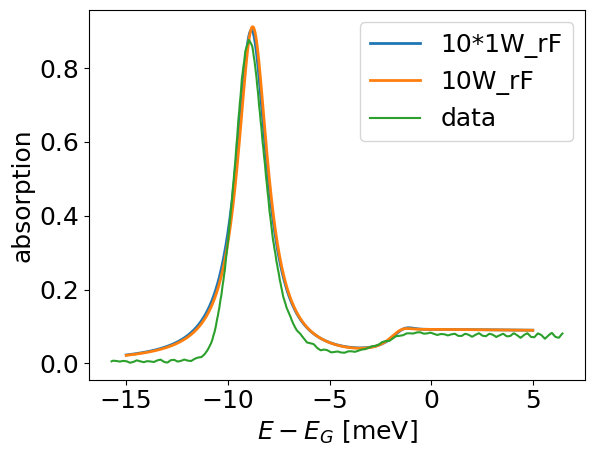

In [29]:
plt.rcParams.update({'font.size': 18})
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_1w_rT_320, label = '1W_rT_320', linewidth = 2)
plt.plot(1000* hbar*(omega_list- 0.012903883497007542), 10*abs_1w_rF_320, label = '10*1W_rF', linewidth = 2)
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_10w_rT_000, label = '10W_rT_000', linewidth = 2)
plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_10w_rF_320, label = '10W_rF', linewidth = 2)

#plt.plot(1000* hbar*(omega_list- 0.012903883497007542), 10*abs_1w_rF_320_old, label = '10*1W_rF_old', linewidth = 2)
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_10w_rF_320_old, label = '10W_rF_old', linewidth = 2)
plt.plot(1000*(energy-1.476), absorption,label = 'data')
plt.xlabel(r'$E-E_G$ [meV]')
plt.ylabel('absorption')
plt.legend()
plt.savefig('linear_spectra_single_and_MQW_new.pdf', bbox_inches='tight')

In [42]:
with open('results/Qdim=700_Qmax=1.5_d_cv0.87_E00.56_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320 = pickle.load(input_file)

In [43]:
with open('results/Qdim=700_Qmax=1.5_d_cv0.87_E00.56_n_wells1_z2500320.0_reflectionsTrue_quadratic_grid_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rT_320 = pickle.load(input_file)

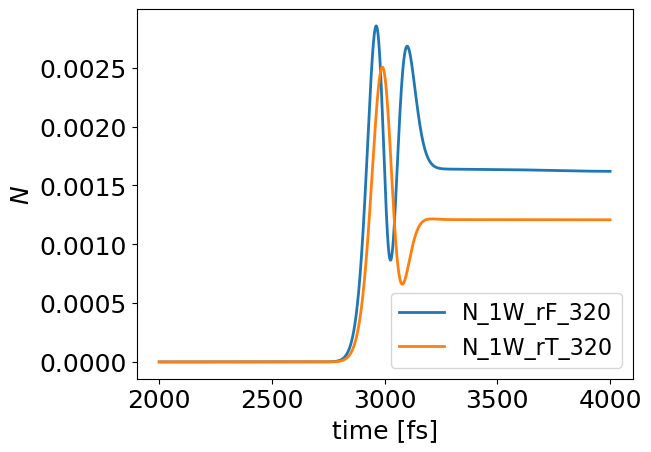

In [64]:
tdim = 100000
tmax = 10000
delta_t = tmax/tdim
tlist = np.linspace(delta_t, tmax, tdim)
start = 20000
end = 40000
plt.plot(tlist[start:end], np.real(N_1W_rF_320[0][start:end]), label = 'N_1W_rF_320',linewidth = 2)
plt.plot(tlist[start:end], np.real(N_1W_rT_320[0][start:end]), label = 'N_1W_rT_320', linewidth = 2)
plt.xlabel('time [fs]')
plt.ylabel(r'$N$')
plt.legend(fontsize = 16)
plt.savefig('occupations_1W_refl_comparison', bbox_inches='tight')

In [10]:
with open('results/Qdim=700_Qmax=1.5_d_cv0.87_E010_pf_corr0.4_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E10 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.87_E0150_pf_corr0.4_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E150 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.87_E030_pf_corr0.4_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E30 = pickle.load(input_file)


FileNotFoundError: [Errno 2] No such file or directory: 'results/Qdim=700_Qmax=1.5_d_cv0.87_E010_pf_corr0.4_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_occupations_MQW.pickle'

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


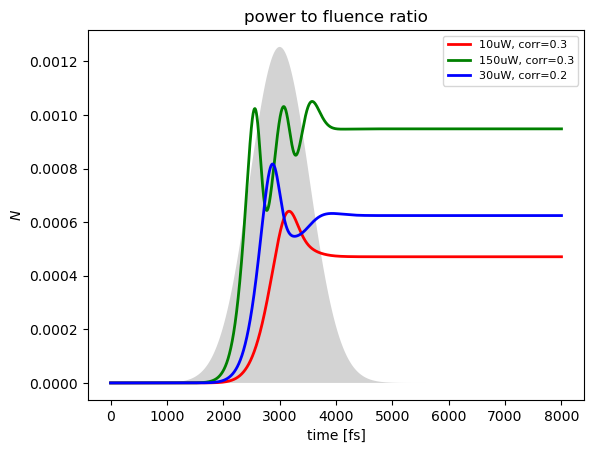

In [9]:
tdim = 100000
tmax = 10000
delta_t = tmax/tdim
tlist = np.linspace(delta_t, tmax, tdim)
start = 0
end = 80000
plt.fill(tlist[start:end],0.8*gauss_pulse(tlist[start:end],E0_from_power(150), sigma1, 3000), 'lightgray')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E10[0][start:end]), 'r-',linewidth = 2,  label = '10uW, corr=0.3')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E150[0][start:end]), 'g-',linewidth = 2,  label = '150uW, corr=0.3')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E30[0][start:end]), 'b-', linewidth = 2, label = '30uW, corr=0.3')



plt.xlabel('time [fs]')
plt.ylabel(r'$N$')
plt.legend(fontsize = 8)
plt.title('power to fluence ratio')
plt.savefig('occupations_comparison_', bbox_inches='tight')

In [18]:
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E010_pf_corr0.3_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid__occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E10_C03 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E0150_pf_corr0.3_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid__occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E150_C03 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E010_pf_corr0.1_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid__occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E10_C01 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E0150_pf_corr0.1_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid__occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E150_C01 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E010_pf_corr0.2_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid__occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E10_C02 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E0150_pf_corr0.2_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid__occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E150_C02 = pickle.load(input_file)

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


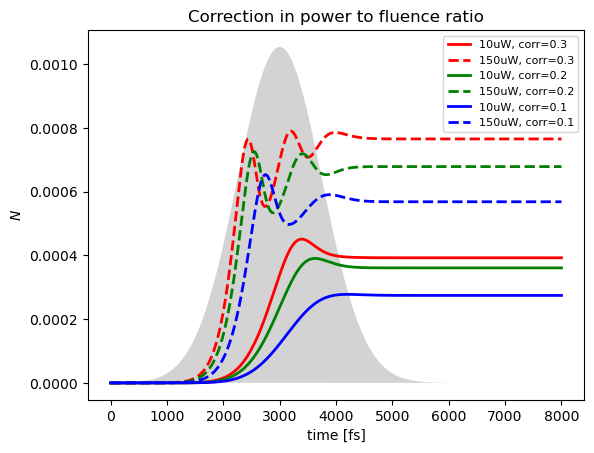

In [27]:
tdim = 100000
tmax = 10000
delta_t = tmax/tdim
tlist = np.linspace(delta_t, tmax, tdim)
start = 0
end = 80000
plt.fill(tlist[start:end],0.8*gauss_pulse(tlist[start:end],E0_from_power(150), sigma1, 3000), 'lightgray')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E10_C03[0][start:end]), 'r-',linewidth = 2,  label = '10uW, corr=0.3')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E150_C03[0][start:end]), 'r--',linewidth = 2,  label = '150uW, corr=0.3')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E10_C02[0][start:end]), 'g-', linewidth = 2, label = '10uW, corr=0.2')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E150_C02[0][start:end]), 'g--',linewidth = 2,  label = '150uW, corr=0.2')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E10_C01[0][start:end]), 'b-', linewidth = 2, label = '10uW, corr=0.1')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E150_C01[0][start:end]), 'b--',linewidth = 2,  label = '150uW, corr=0.1')



plt.xlabel('time [fs]')
plt.ylabel(r'$N$')
plt.legend(fontsize = 8)
plt.title('Correction in power to fluence ratio')
plt.savefig('occupations_comparison_pfcorrections', bbox_inches='tight')

In [34]:
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E010_pf_corr30_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_linearconversion_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E10_C30 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E0150_pf_corr30_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_linearconversion_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E150_C30 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E010_pf_corr35_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_linearconversion_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E10_C35 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E0150_pf_corr35_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_linearconversion_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E150_C35 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E010_pf_corr40_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_linearconversion_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E10_C40 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E0150_pf_corr40_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_linearconversion_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E150_C40 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E030_pf_corr30_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_linearconversion_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E30_C30 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E030_pf_corr35_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_linearconversion_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E30_C35 = pickle.load(input_file)
with open('results/Qdim=700_Qmax=1.5_d_cv0.76_E030_pf_corr40_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_linearconversion_occupations_MQW.pickle', 'rb') as input_file:
    N_1W_rF_320_E30_C40 = pickle.load(input_file)


/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


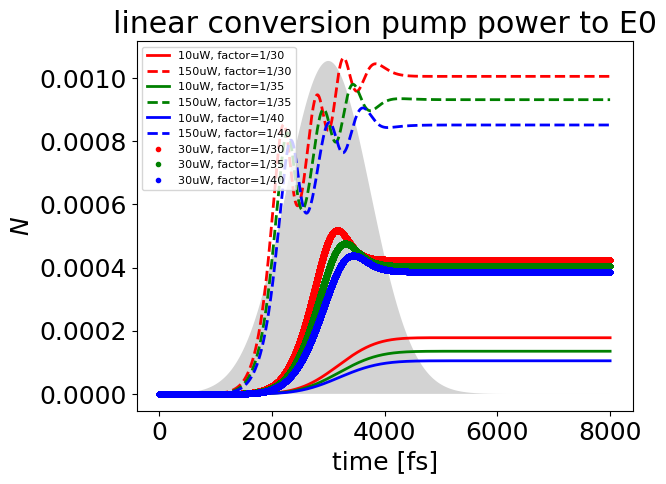

In [35]:
tdim = 100000
tmax = 10000
delta_t = tmax/tdim
tlist = np.linspace(delta_t, tmax, tdim)
start = 0
end = 80000
plt.fill(tlist[start:end],0.8*gauss_pulse(tlist[start:end],E0_from_power(150), sigma1, 3000), 'lightgray')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E10_C30[0][start:end]), 'r-',linewidth = 2,  label = '10uW, factor=1/30')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E150_C30[0][start:end]), 'r--',linewidth = 2,  label = '150uW, factor=1/30')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E10_C35[0][start:end]), 'g-', linewidth = 2, label = '10uW, factor=1/35')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E150_C35[0][start:end]), 'g--',linewidth = 2,  label = '150uW, factor=1/35')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E10_C40[0][start:end]), 'b-', linewidth = 2, label = '10uW, factor=1/40')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E150_C40[0][start:end]), 'b--',linewidth = 2,  label = '150uW, factor=1/40')
plt.plot(tlist[start:end], np.real(N_1W_rF_320_E30_C30[0][start:end]), 'r.',linewidth = 1,  label = '30uW, factor=1/30')

plt.plot(tlist[start:end], np.real(N_1W_rF_320_E30_C35[0][start:end]), 'g.', linewidth = 1, label = '30uW, factor=1/35')

plt.plot(tlist[start:end], np.real(N_1W_rF_320_E30_C40[0][start:end]), 'b.', linewidth = 1, label = '30uW, factor=1/40')



plt.xlabel('time [fs]')
plt.ylabel(r'$N$')
plt.legend(fontsize = 8)
plt.title('linear conversion pump power to E0')
plt.savefig('occupations_comparison_linearconversion', bbox_inches='tight')

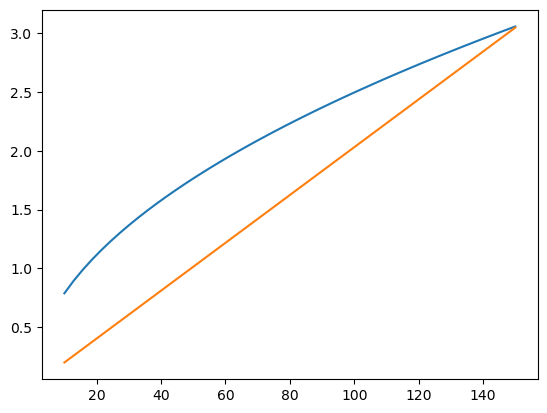

In [18]:
from functions import E0_from_power
import numpy as np
sigma = 1250/(2*(2*np.log(2))**(1/(2)))
plt.plot(np.linspace(10,150,50),E0_from_power(np.linspace(10,150,50),sigma = sigma,pf_corr = 0.43))
plt.plot(np.linspace(10,150,50), np.linspace(0.037,0.56,50)*2*np.pi*hbar/d_cv )

In [1]:
print(150*0.0037)

0.555


In [5]:
from parameters_eigen import *
np.sqrt(0.68*16*6.24157*1e-2*4*np.sqrt(np.pi)*462/(epsilon_0*c*n_ref))*2*d_cv/(hbar*np.pi)

4.72256854845548

In [16]:
print([1][0])

1


In [7]:
1250/(2*np.sqrt(np.log(2)))

750.7015054915312

In [18]:
p = np.array([1,2,3])
#Qdim, tdim = np.shape(p)
print(np.shape(p))
#print(Qdim)
#print(tdim)

(3,)


In [ ]:
np.sqrt(0.68*16*6.24157*1e-2*2/(462*epsilon_0*c*n_ref*np.pi*np.sqrt(np.pi)))